(introduction)=
# Preview

Most textbooks in mathematical statistics spend a considerable amount of time in the early chapters developing a theoretical foundation in probability theory before moving on to applications. As you can see from the menu to the left, this book is not an exception. While this order of topics is based on logical necessity, it might also give readers the false impression that mathematical statistics is just another abstract mathematical theory with little connection to their real-world interests. 

One of my goals in writing this book is to connect the theory to applications as early as possible, beginning in earnest in {numref}`Chapter %s <theory-to-practice>`. The first few [programming assignments](https://github.com/jmyers7/stats-book-materials) in the Jupyter notebooks are also useful in this respect, giving the reader _something_ hands-on and tangible to do in the early chapters while we're studying obscure probability distributions and integrating one contrived density function after another.

But still, the reader may have _no idea_ where the book is headed! This brief "Preview" chapter is intended to give the reader some indication of our direction and goal, by describing _inferential statistics_ and _statistical estimators_, topics that we will cover beginning in {numref}`Chapter %s <stats-estimators>` and continuing through the end of the book. The reader should understand that the theory in the first part of the book is built to serve as a foundation for the tools and techniques in these latter chapters.

So, this initial chapter offers the opportunity to survey some beautiful concepts and ideas without getting sidetracked into technical theory. I will introduce several big-picture ideas and some key terminology. The reader should not be nervous or anxious about understanding everything in this chapter _in depth_, and should rest assured that we will cover all the concepts in much more detail later. Remember, this is only a preview!











## The goal of inferential statistics

Our story begins here:

> Neither perfect precision nor absolute certainty exist, in all cases, in the real world.

No deep philosophical meaning is intended with this comment; rather, I'm just highlighting the obvious fact that in the real world we often only have access to incomplete information and limited data. Nevertheless, in such situations we often still need to make decisions, predictions, or inferences.

As a very simple example, suppose that we would like to determine the average height of the current population of the planet earth. One way to do this is to conduct a massive planet-wide census of every living person and record their height. We would then have _all_ the data we need in order to find the *exact* average height---there would be no problem arising from limited data.

But clearly such a census would never *actually* be conducted due to the enormous(!) cost, among many other reasons. Rather, we might instead proceed by taking a _sample_ of the population:

```{image} ../img/people.svg
:width: 70%
:align: center
```
&nbsp;

We would then use the average height of the individuals in the sample as a proxy or estimate for the true average height of the population. And as long as our sample is chosen "randomly," we would expect that our sample average is likely close to the true population average.

Here are some other examples along these same lines:

1. We estimate the median GPA of _all_ incoming freshmen at a certain university based on a sample of incoming freshmen.

2. We estimate the likelihood that a sports team with a given record wins a championship based on the winning records of past champions.

3. We estimate the likelihood that a tumor of a certain size is malignant or benign based on the diagnoses of past tumors and their sizes.

4. We predict the next word in a new sentence fragment based on a sample of similar, complete sentences. (This is, in essence, the goal of so-called *large language models* in artificial intelligence.)

5. We estimate the true speed of light based on a sample of measurements obtained in a laboratory.

The characteristic that each of these examples share is the goal of making an inference or prediction about a population based on a sample. Note that, here, I'm using the word *population* in a broader sense compared to its typical usage in everyday language. Indeed, the *populations* in these examples might be the following:

1. All incoming freshmen.

2. All win-loss records.

3. All tumor sizes.

4. All words.

5. All speeds.

Thus, a *population* in probability and statistics need not consist of a population of _people_, as it often does in everyday language.

```{prf:definition}
:label: population-def

The *population* in a given scenario is the collection of all items or objects under consideration.
```

Continuing with our five examples, let's now identify *precisely* what features or characteristics of each of the populations we aim to predict or estimate:

1. The median GPA of the population. (A *single* number.)

2. A probability for each win-loss record. (A *collection* of numbers.)

3. A probability for each tumor size. (A *collection* of numbers.)

4. A probability for each word. (A *collection* of numbers.)

5. The value of the single "true" speed of light. (A *single* number.)

In examples (2)-(4), we are attempting to estimate an entire *probability distribution*, which are some of the most important objects in this course. We will talk about them in much more detail beginning in the [next](prob-spaces) chapter.

In all the examples, the things that we aim to estimate are called _population parameters_. Using this language, we may state:

> The **goal of inferential statistics** is to estimate population parameters based on samples and datasets.

```{margin}
We will discuss samples and datasets beginning in {numref}`Chapter %s <theory-to-practice>`, while our treatment of inference will begin properly in {numref}`Chapter %s <stats-estimators>`.
```

The process of collecting data is called *sampling*, which passes from the population to the sample. You should then conceptualize *inference* as a process that goes in the opposite direction:

```{image} ../img/inferential.svg
:width: 70%
:align: center
```
&nbsp;

A good part of inferential statistics is devoted to cooking up clever methods and algorithms for estimating population parameters and characteristics. You should conceptualize these methods as "machines" that take datasets as input, and spit out estimates for whatever population parameter the machine is built for. Such machines are called *estimators*:

```{image} ../img/inference.svg
:width: 70%
:align: center
```
&nbsp;

For some estimators, you can write down simple formulas that completely describe them. Others might be much more complicated, and are better conceptualized as multistep algorithms. If your "machine" (i.e., estimator) is capable of "learning" how to make good estimates all on its own, then you've entered the world of *machine learning*.
















## Case study: the speed of light and statistical estimators

Now that we know a little about the goal of inferential statistics and estimators, I can describe one of the roles that probability theory plays in statistics:

> Probability theory gives us the tools to *quantify* our confidence in our estimators.

To help illustrate, let's return to one of our examples from above: The speed of light!

The first thing to know is that light travels very, *very* fast---on the order of 300,000 km/s, in fact. This is so *incredibly fast* that a beam of light would circle the earth about 7.5 times per second:

```{image} ../img/light.svg
:width: 70%
:align: center
```
&nbsp;

In 1897, American physicist <a href="https://en.wikipedia.org/wiki/Albert_A._Michelson">Albert Michelson</a> set out to improve upon the best estimate of the speed of light at that time. Here is his data:

In [1]:
import pandas as pd

df = pd.read_csv('../aux-files/light_speeds.csv')
df

,speeds
0,850
1,1000
2,960
3,830
4,880
...,...
95,840
96,760
97,780
98,850


You can see that there are 100 measurements in the dataset. To save us from having to write big numbers over and over, each data point is in the following format:

$$
\text{(data point)} = \text{(estimated speed of light)} - 299{,}000.
$$

So, if you want to recover the estimates of the speed of light from Michelson's data in the format above, you need to add 299,000 km/s to each value.

As we mentioned above, you should conceptualize Michelson's dataset as a sample from the larger *population* (in the technical sense) of all the possible speeds that he _could_ have measured:

```{image} ../img/speed_pop.svg
:width: 70%
:align: center
```
&nbsp;

We then imagine that somewhere in the big population of speeds is the "true" speed of light.

The population of speeds is technically the open interval $(0,\infty)$ since Michelson could have (theoretically) obtained any positive number, though some numbers---like an estimate of 5 km/s---are far less likely to have been measured compared to others. If we take advantage of the linear ordering of $(0,\infty)$, we can *visualize* Michelson's dataset as:

```{margin}

This plot is closely related to the _probability histograms_ of _empirical probability distributions_; we will study these in detail in {numref}`Chapter %s <theory-to-practice>`.
```

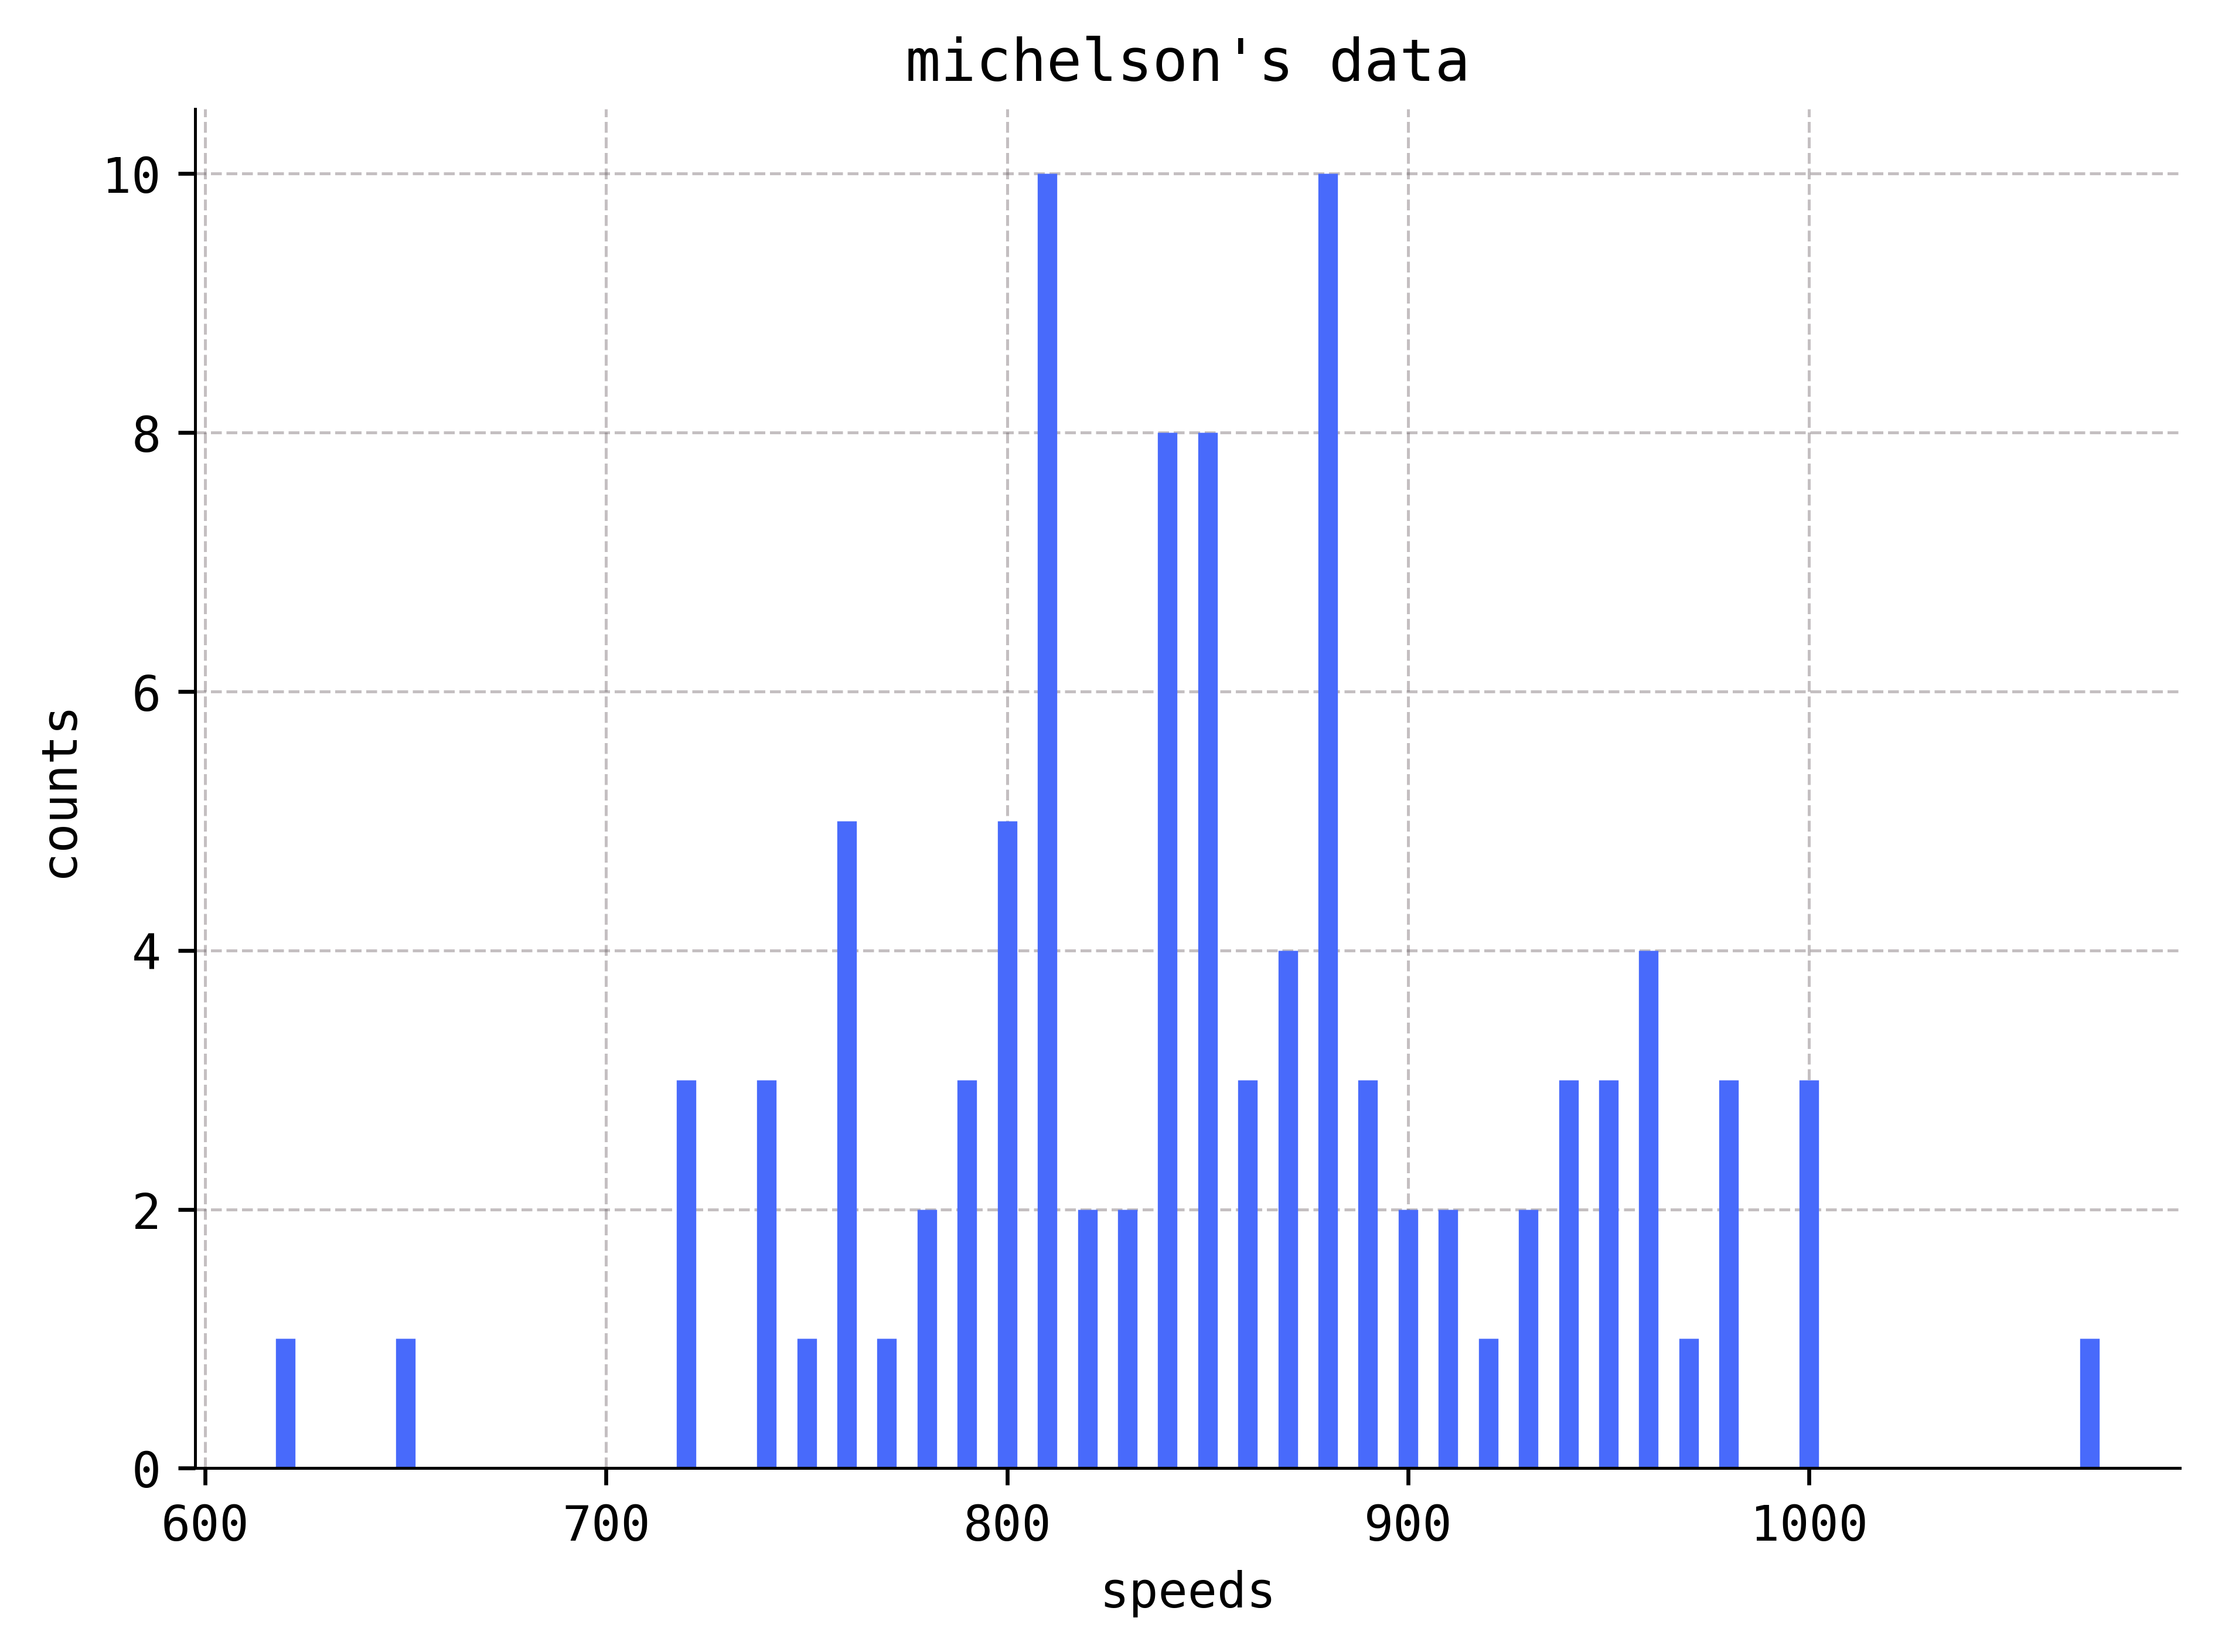

In [2]:
import matplotlib.pyplot as plt
plt.style.use('../aux-files/custom_style_light.mplstyle')

import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 600

# custom function for probability histograms and bar plots
def prob_hist(xvals, yvals, stemwidth=25, title='', xlabel='values',
              ylabel='probability', size=(-1, -1), vline='', hline='',
              ymax='', set_xticks=True):
    
    _, stems, _ = plt.stem(xvals, yvals, basefmt=' ', markerfmt=' ')
    plt.setp(stems, 'linewidth', stemwidth)
    plt.gca().set_ylim(ymin=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    if ymax != '':
        plt.gca().set_ylim(ymax=ymax)
    if set_xticks:
        plt.gca().set_xticks(xvals)
    if size != (-1,-1):
        plt.gcf().set_size_inches(size)
    if vline != '':
        plt.axvline(x=vline, color='red', linestyle='--')
    if hline != '':
        plt.axhline(y=hline, color='red', linestyle='--')
    plt.tight_layout()

data = df['speeds'].value_counts().sort_index()
speeds = data.index.tolist()
counts = data.values.tolist()

prob_hist(speeds, counts, stemwidth=4,
          title='michelson\'s data', xlabel='speeds',
          ylabel='counts', set_xticks=False)

Notice that the horizontal axis is the "speed" axis, while the vertical axis counts how many times a certain speed appears in Michelson's dataset. Thus, we see that two speeds of $\approx 810$ and $\approx 880$ were measured most often, each ten times.

```{margin}

Perhaps this choice of estimator isn't as "obvious" as I say it is. :) For example: Why not use the sample *median* as our estimator?
```

Now, in order to estimate the "true" speed of light from Michelson's dataset, we need an estimator! We need some sort of machine that will take Michelson's dataset as input and return an estimate for the "true" speed of light. But there's an obvious choice for such an estimate, right? The sample mean!

If we compute the mean value of Michelson's data, we get a value of

$$
\bar{x} \stackrel{\text{def}}{=} 852.4,
$$

```{margin}

It is helpful to think of the _variability_ of an estimator as a measure of [_precision_](https://en.wikipedia.org/wiki/Accuracy_and_precision); this will be the focus of our current discussion. The _accuracy_ of an estimator is then measured by something called _bias_. We will dicuss both these concepts in much more detail in {numref}`Chapter %s <point-est>`.
```

which we will take as our official estimate for the "true" speed of light. But how confident are we in the quality of our estimator? We might imagine that if Michelson were to take all the measurements again, obtaining another 100-sample dataset, then the estimate $\bar{x}$ would be _different_. This variation might be due to systematic deficiencies in Michelson's measuring apparatus and experimental setup (i.e., bad data collection), it might be due to plain random error, but it might _also_ be due to a bad choice of estimator on our part. In general, all of these factors conspire together to affect the variability of our estimates, and it can be difficult to isolate and assign blame to any one _specific_ factor over the others. So, when we talk about the "quality" of our estimator in terms of variability, one needs to remember that this variability comes from many sources.

Keeping these caveats and cautions in mind, let me make the central point:

> Since the dataset has variability, so too does our estimator.

Remember, an estimator is just a fancy function that takes datasets as input. So, this statement simply says that the output of a function changes when the input does (duh). But the key question is: *By how much*? If we were able to quantify this variability in some way, then smaller measures of variability might indicate a higher level of confidence in our estimator.

But _how_ exactly might one quantify variability? This is where probability theory enters!

Here's what we do: Imagine that it is somehow possible to repeat Michelson's procedure an infinite number of times, producing an infinite collection of 100-sample datasets under the exact same conditions as the original procedure. Of course, this is purely a thought exercise, because it isn't *actually* possible to repeat a process an infinite number of times. Nevertheless, as we go along, we imagine computing the means of each of the new datasets; these means will *not* all be the same due to the variability that I mentioned above. In the "limit," we obtain a distribution of mean values that looks roughly something like this:

```{margin}

The bar plot is a _probability histogram_ of the _sampling distribution_ for our estimator; the latter objects will be studied in {numref}`Chapter %s <stats-estimators>`. The smooth curve is a _kernel density estimate_ (_KDE_) for the sampling distribution; these will be studied in {numref}`Chapter %s <theory-to-practice>`.
```

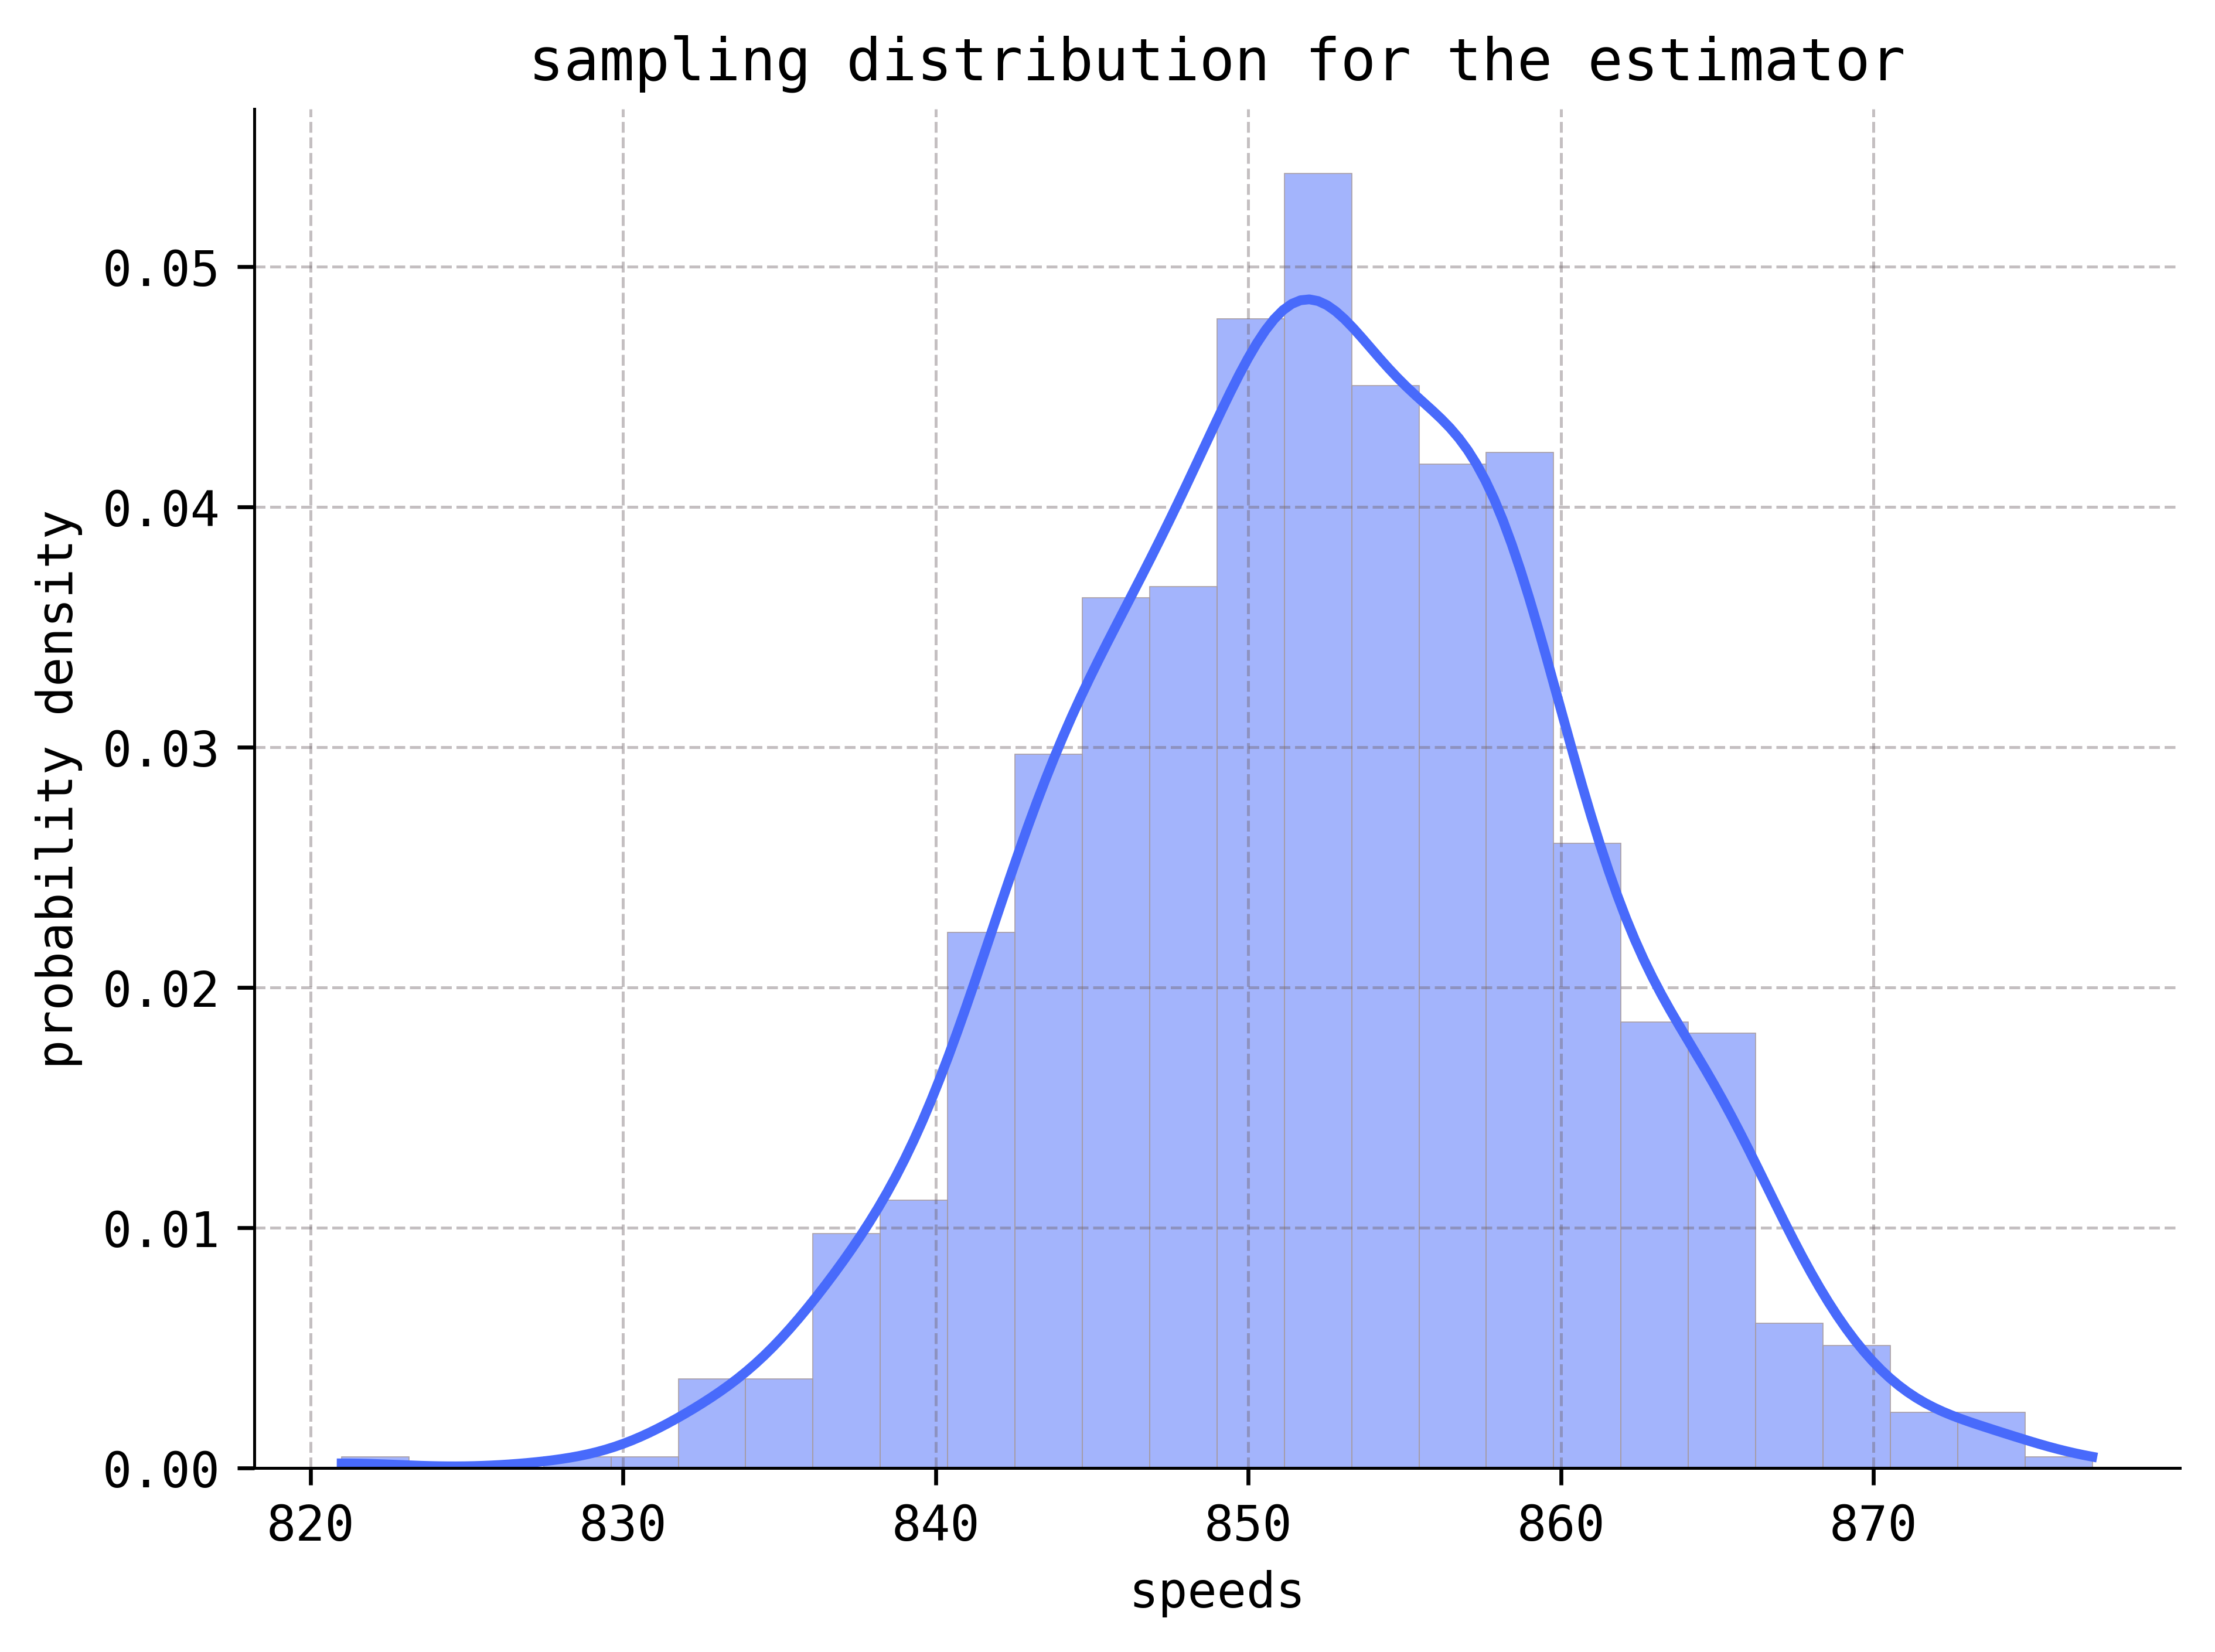

In [3]:
import seaborn as sns
import numpy as np

np.random.seed(42)
k = 1000 # number of replicate means
replicates = []

for i in range(k):
    boot_sample = df['speeds'].sample(frac=1, replace=True)
    replicates.append(boot_sample.mean())

sns.histplot(data=replicates, kde=True, stat='density')
plt.title(r'sampling distribution for the estimator')
plt.xlabel('speeds')
plt.ylabel('probability density')
plt.tight_layout()

Along the horizontal axis we see speeds, as with the plot we saw previously. However, along the vertical axis we now see "probability density" instead of count values. This just means that areas under the curve (which are $\approx$ the areas of the rectangles) represent probability. Intervals of speeds along the horizontal axis that lie underneath large amounts of area represent values that are more likely to be outputs of our estimator; for example, according to the figure, it is _much_ more likely for our estimator to output a value in the interval $[845,855]$ compared to the interval $[820,830]$.

```{margin}

This interval is an example of a _95%-confidence interval_. These will be studied in {numref}`Chapter %s <CIs>`.
```

Now, a _specific_ measure of the variability of our estimator is the interval of values over which 95% of the probability ($=$ area!) sits. It is possible to have a computer find this interval for us:

In [4]:
ci = np.quantile(replicates, [0.025, 0.975]).tolist()
print(f'The interval is [{ci[0]}, {ci[1]}].')

The interval is [836.795, 867.31].


If we put vertical lines on our probability density plot representing the endpoints of this interval, we get:

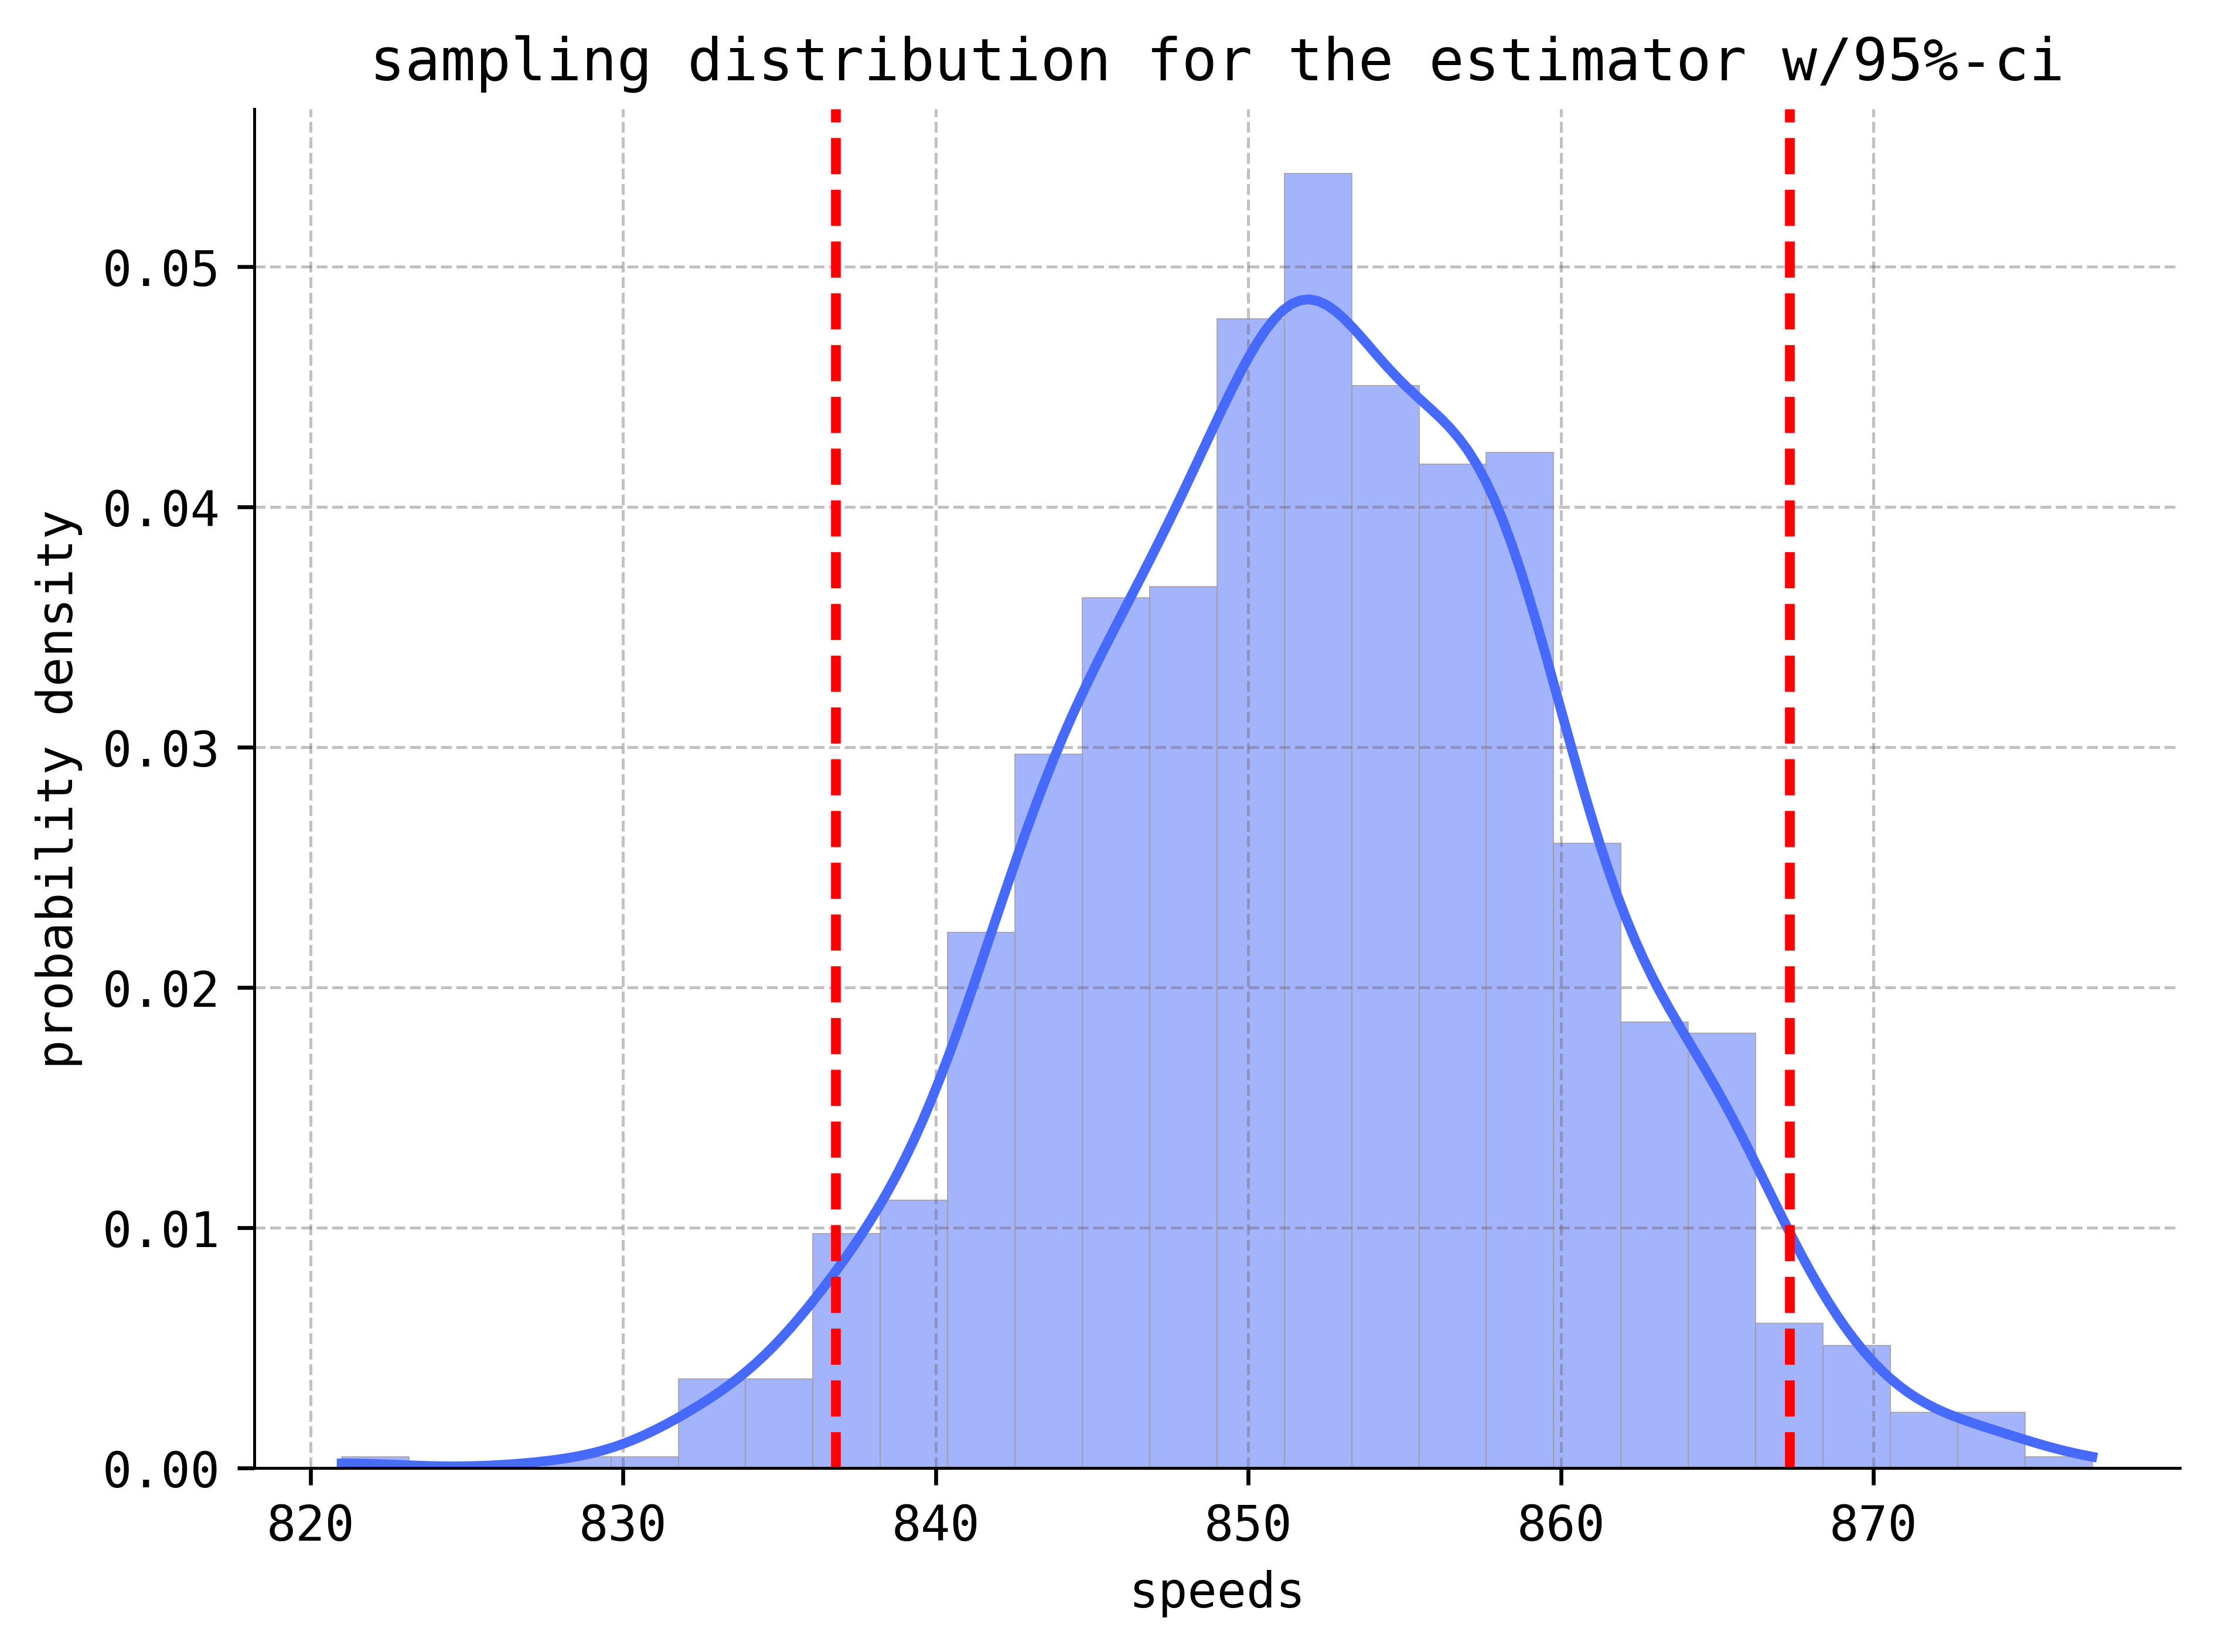

In [5]:
sns.histplot(data=replicates, kde=True, stat='density')
plt.title('sampling distribution for the estimator w/95%-ci')
plt.xlabel('speeds')
plt.ylabel('probability density')
plt.axvline(x=ci[0], color='red', linestyle='--')
plt.axvline(x=ci[1], color='red', linestyle='--')
plt.tight_layout()

```{margin}
Does this mean that we may conclude with 95% probability that the "true" speed of light is in the interval between the two vertical lines? I encourage you to think _very carefully_ about this question. We will discuss the answer later in {numref}`Chapter %s <CIs>`.
```

Since 95% of the probability ($=$ area!) sits over the interval between the two vertical lines, if we feed a 100-sample dataset into our estimator, we expect it to output values in that interval with 95% probability. The length of this interval is about 30 km/s, and since we are dealing with numbers on the order of 300,000 km/s, that length is 1 part in 10,000 relative to the order of magnitude of the data. We would need an experimental physicist to contextualize these numbers for us, but it seems (in my completely uninformed opinion) like that's a pretty small error! (Remember, it was 1897!) This leads us to:

> The variability in our estimator is relatively small-ish, which is evidence for a high-ish level of confidence in our estimator.


We can't _decisively_ conclude that our estimator is a good one just from this analysis alone; after all, there might be other metrics for "goodness" that paint a dimmer picture. We will discuss these matters in much more detail later in {numref}`Chapter %s <point-est>`; this discussion is only meant as a preview, and also to indicate how probability theory fits in with the program of inferential statistics.











## Summary

Let's wrap up by zooming out and summarizing the higher-level concepts and workflow described in our speed of light example. There are really two things going on in most statistical inference tasks:

* First, one must construct an estimator for the target population parameter.

In our speed of light example, constructing the estimator was easy: We simply defined our estimator to compute sample means. But in general, constructing good estimators might be much more difficult. In some situations, there are general principles that help guide the design of estimators; in others, it's more art than science, and the analyst gets the opportunity to flex their creative skills!

* Then, one conducts a statistical and probabilistic analysis to describe the variability (i.e., precision), the bias (i.e., accuracy) and other properties of the estimator. These metrics serve as measures for our "confidence" in an estimator's outputs and allow us to compare one estimator to another.

As we will see in {numref}`Chapter %s <point-est>`, there is an extensive theory built around the statistical analysis of an estimator, and that our analysis in the speed of light example is only the beginning of the story.